In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('Student_Performance.csv')

In [3]:
df.head()

,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [4]:
# One problen for visualization => 10000 rows
df.describe()

,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


In [5]:
# Take 1000 sample for visualization
sample = df.sample(1000)

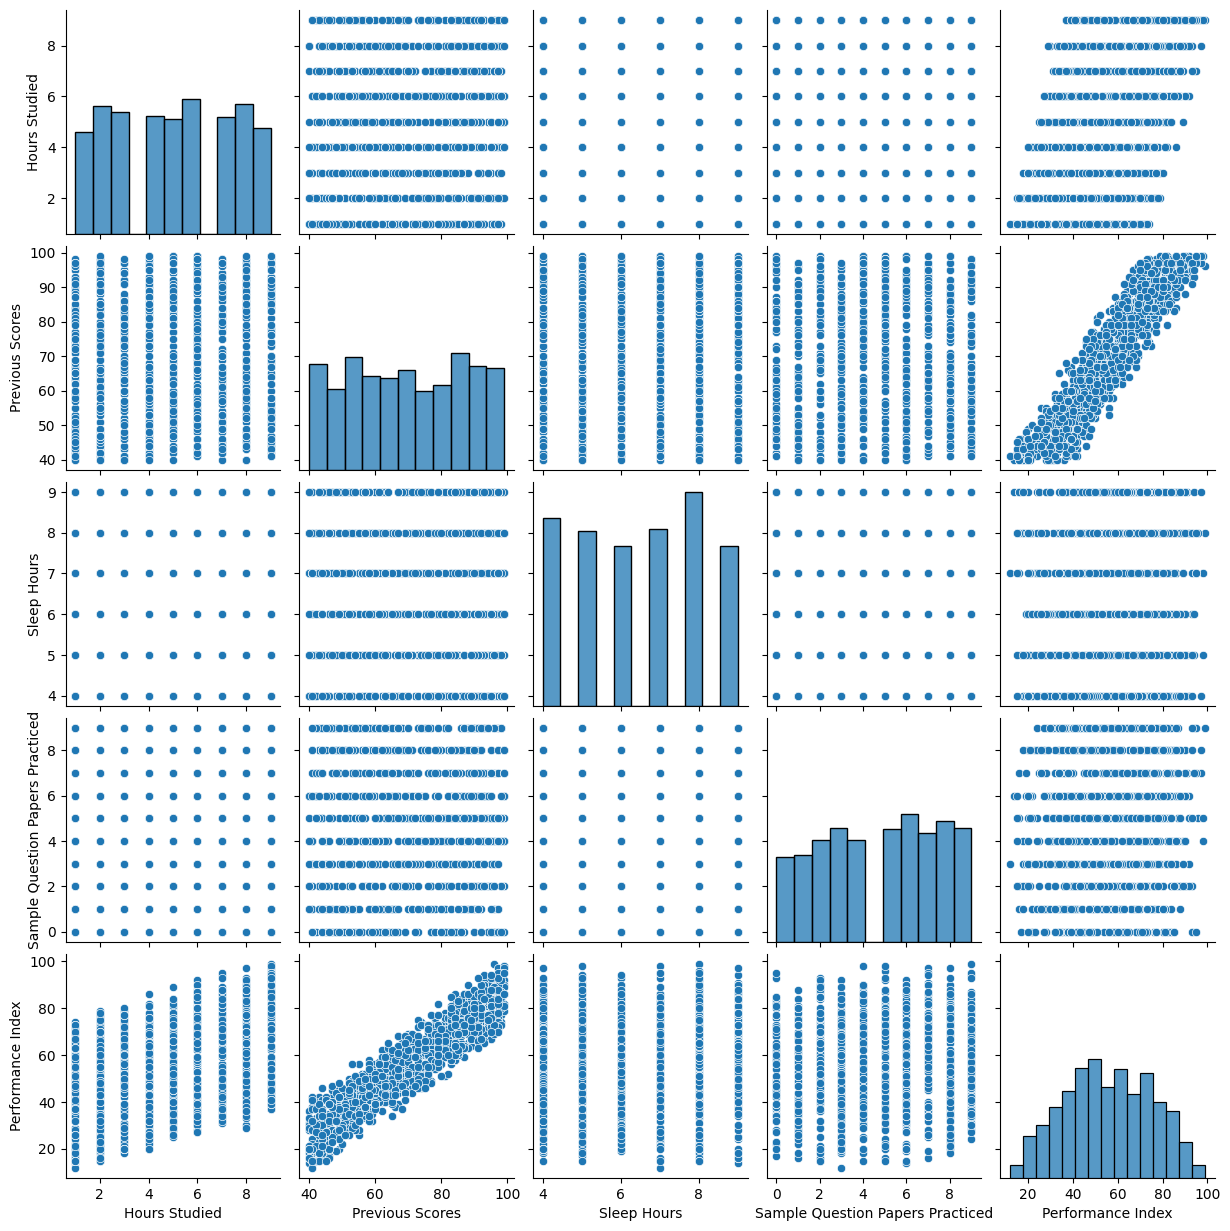

In [6]:
# Basic pair plot, we can see any obvious
# Looks like previous scores corralate with performance index
# Also study hours have some correlation
sns.pairplot(sample)

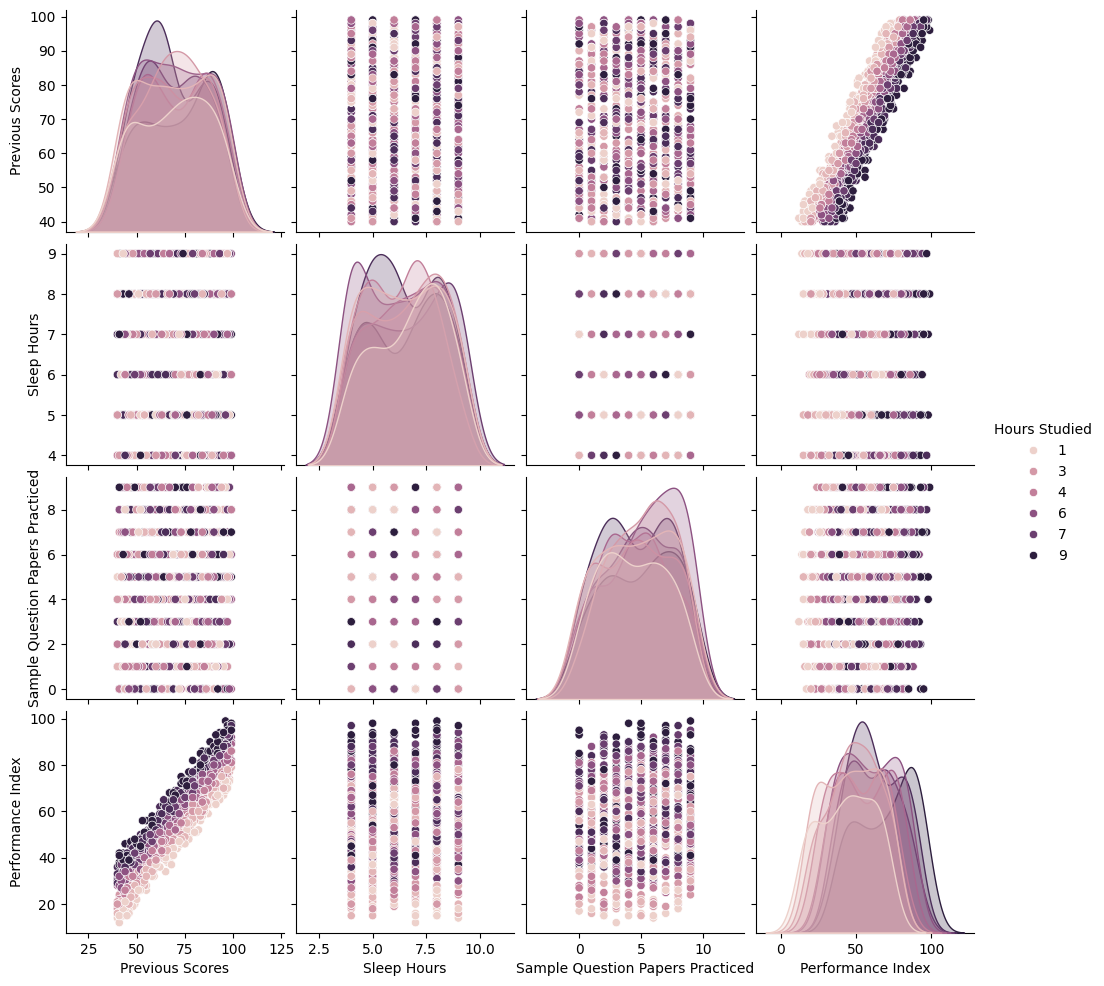

In [7]:
# This confirms that performance index is based on study hours and especially previous scores
sns.pairplot(sample, hue='Hours Studied')

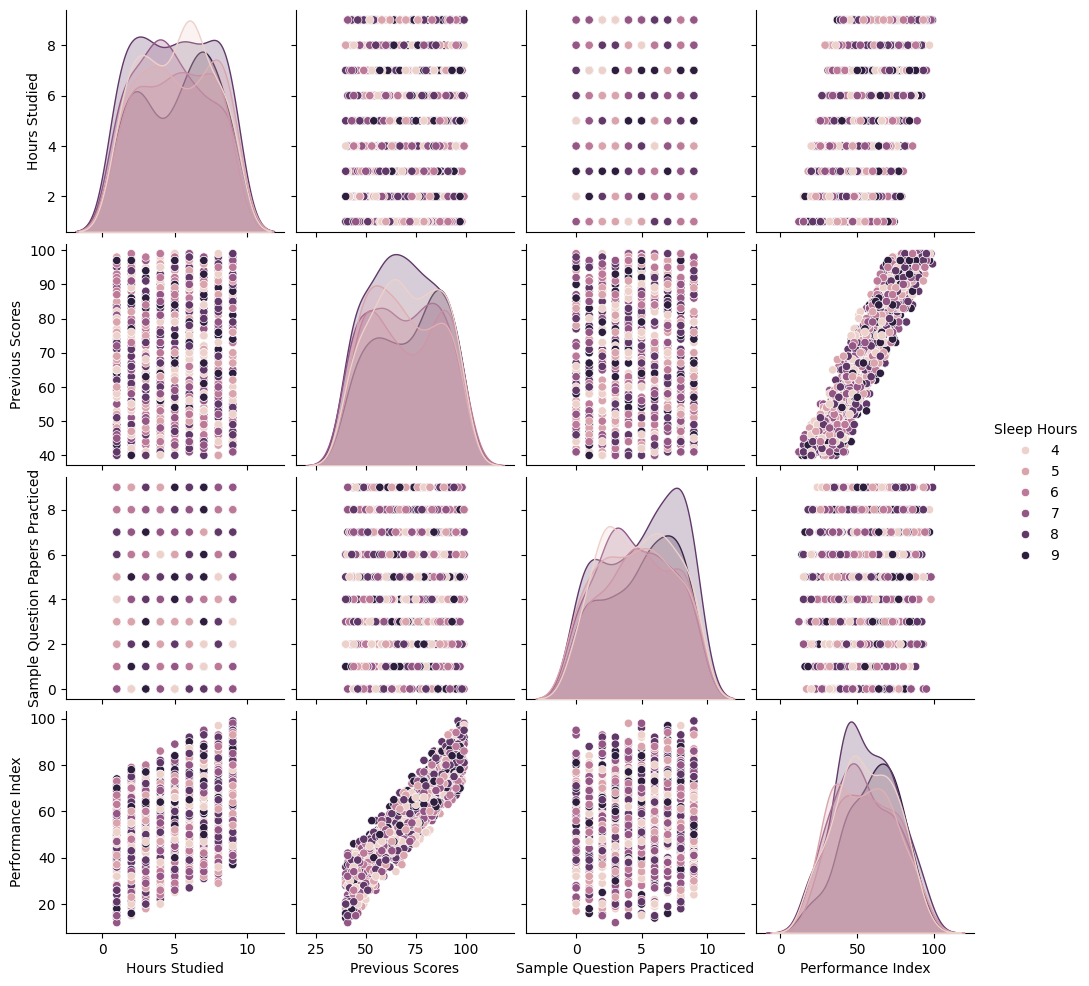

In [8]:
# Sleep hours doesn't affect that much
sns.pairplot(sample, hue='Sleep Hours')

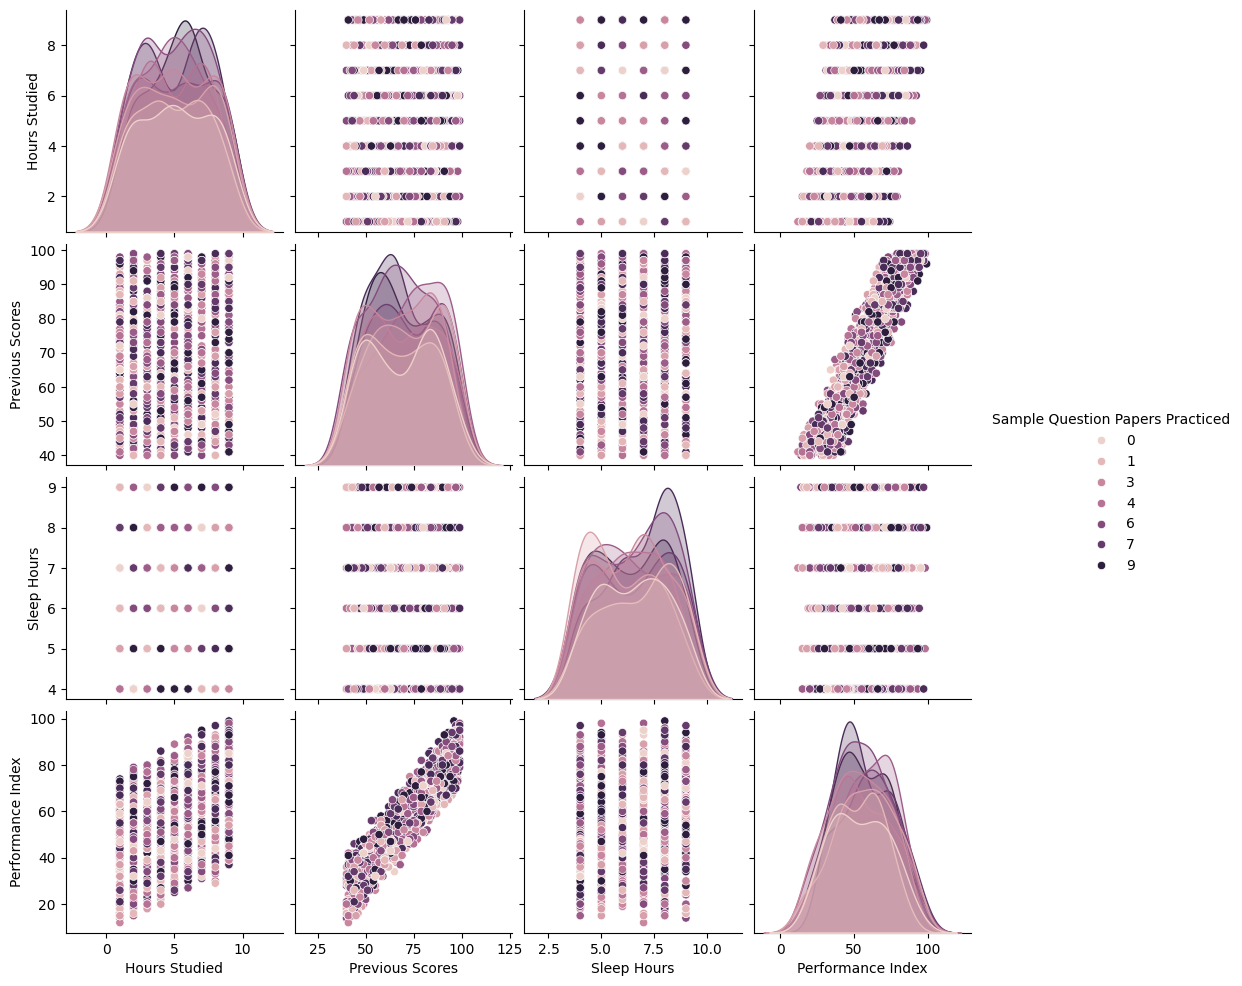

In [9]:
# Sample question papers practiced doesn't affect that much
sns.pairplot(sample, hue='Sample Question Papers Practiced')

In [10]:
# it seems, performance index is mostly affected by previous scores
# within that, also study hours affect positively
# sleep hours doesn't seem to affect
# sample question papers show a small representeation in ~50 performance
# maybe students who have challenges with a certain subject, try their best 
# to get a better score?

#### Further inspection: regression plots

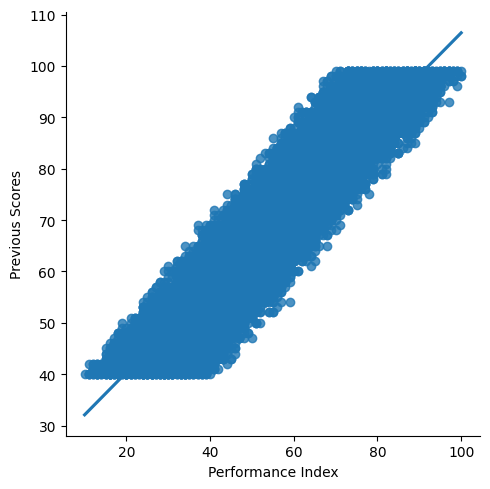

In [11]:
# Strong correlation, as noticed previously
sns.lmplot(x='Performance Index', y='Previous Scores', data=df)

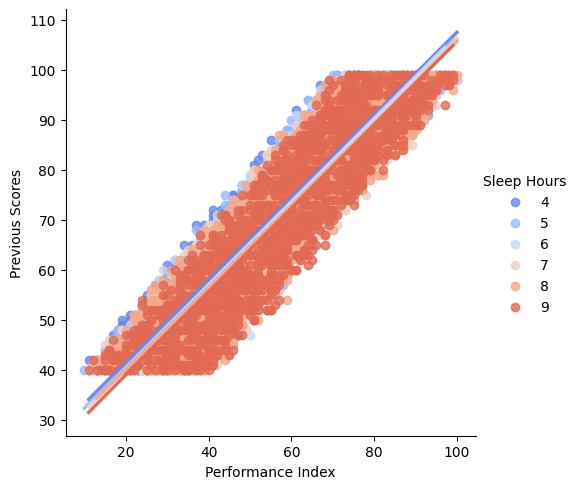

In [12]:
# Sleep hours doesn't really matter
sns.lmplot(x='Performance Index', y='Previous Scores', hue='Sleep Hours', data=df, palette='coolwarm')

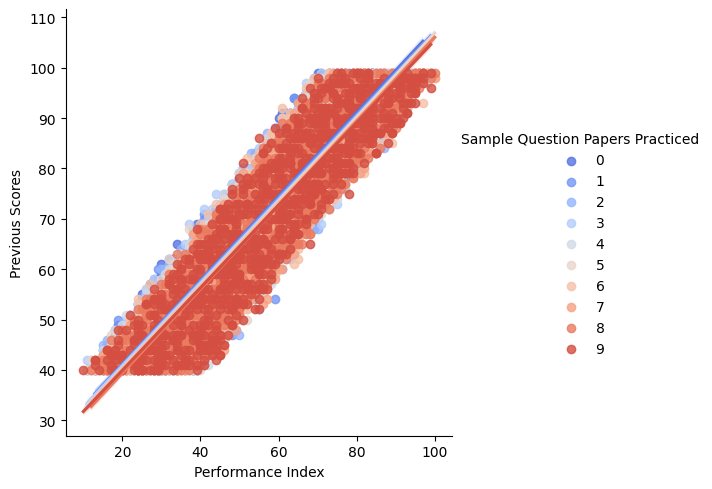

In [13]:
# Sleep hours doesn't really matter
sns.lmplot(x='Performance Index', y='Previous Scores', hue='Sample Question Papers Practiced', data=df, palette='coolwarm')

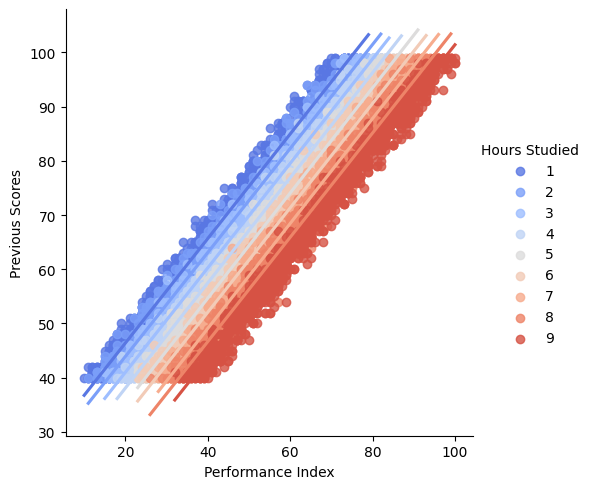

In [14]:
# One picture sums up whole analysis => shows how performance is built
# Shows also that data is synthetic, real life data is more chaotic
# Usually can't represent whole analysis with just one picture
sns.lmplot(x='Performance Index', y='Previous Scores', hue='Hours Studied', data=df, palette='coolwarm')

<Axes: >

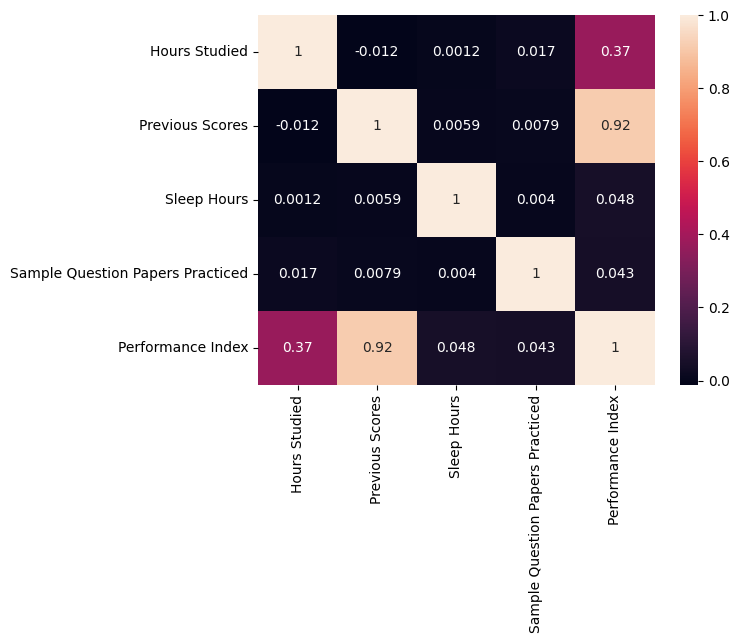

In [15]:
# Correlations support findins quite well
# This happens because data is highly linear without hidden connections
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True)

C:\Users\jtsil\AppData\Local\Temp\ipykernel_23640\1380532325.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df, palette='coolwarm')


<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

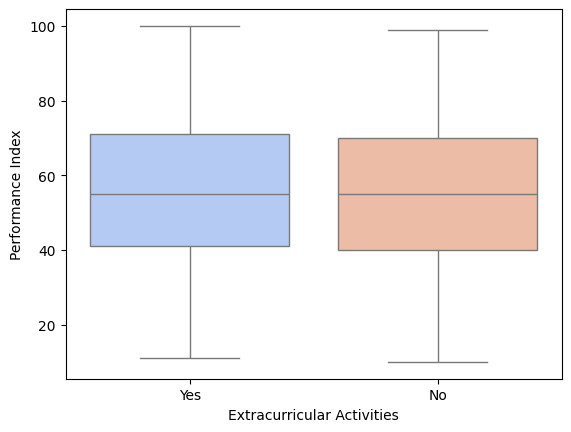

In [16]:
# Compare extracurricular activity category with boxplot
sns.boxplot(x='Extracurricular Activities', y='Performance Index', data=df, palette='coolwarm')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

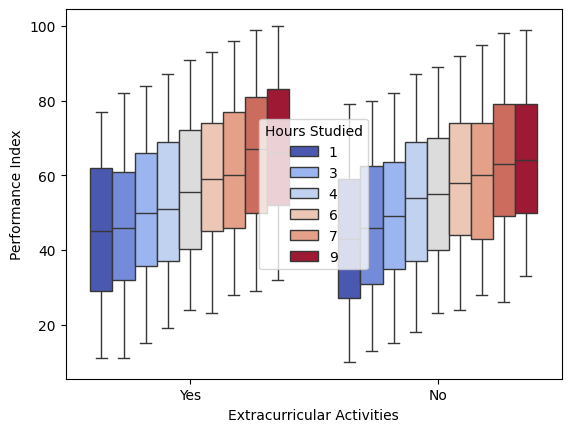

In [17]:
# Compare extracurricular activity category with boxplot, hue on hours studied
sns.boxplot(x='Extracurricular Activities', y='Performance Index', hue='Hours Studied', data=df, palette='coolwarm')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

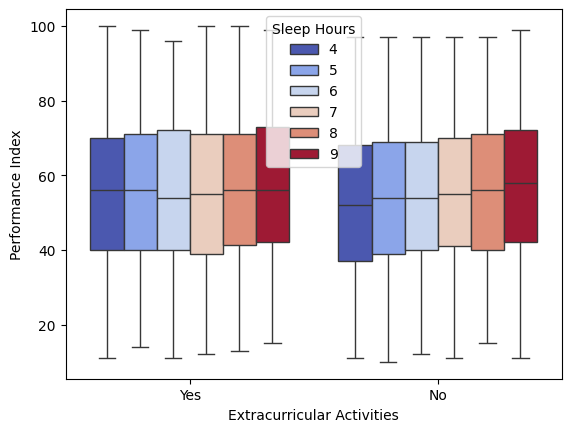

In [18]:
# Compare extracurricular activity category with boxplot, hue on hours studied
sns.boxplot(x='Extracurricular Activities', y='Performance Index', hue='Sleep Hours', data=df, palette='coolwarm')

<Axes: xlabel='Extracurricular Activities', ylabel='Performance Index'>

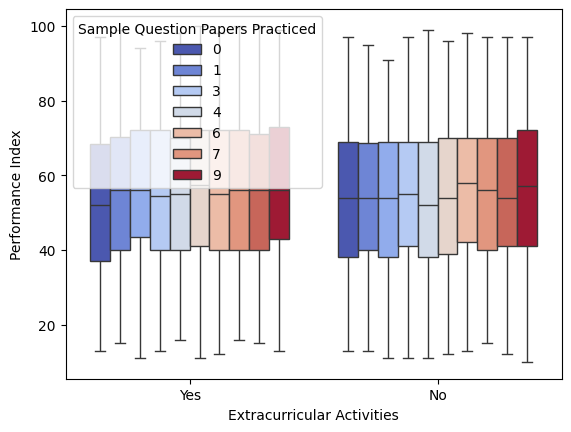

In [19]:
# Not very practical since values legend is on top of plot
sns.boxplot(x='Extracurricular Activities', y='Performance Index', hue='Sample Question Papers Practiced', data=df, palette='coolwarm')

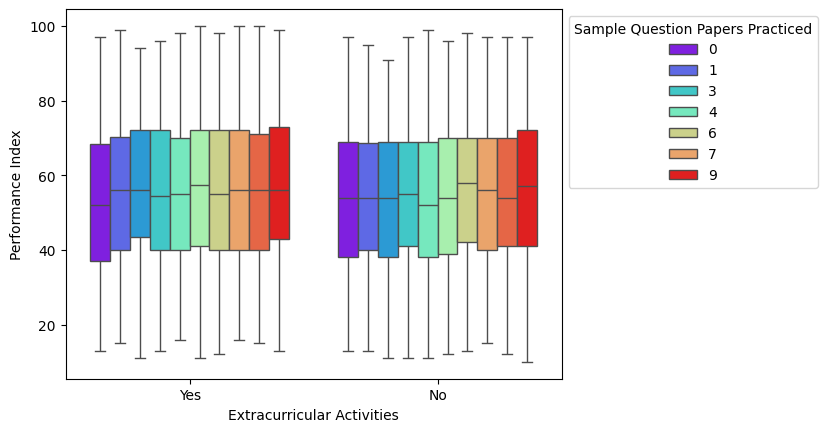

In [20]:
# you can use matplotlib to move the legend on the side
# a bit difficult to remember, but works perfectly
ax = sns.boxplot(x="Extracurricular Activities", y="Performance Index", data=df, hue="Sample Question Papers Practiced", palette="rainbow")
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))